# WEEK 7 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression


In [18]:
data=pd.read_excel("C:/Users/Venu  Gopal/Desktop/lrm.xlsx")
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


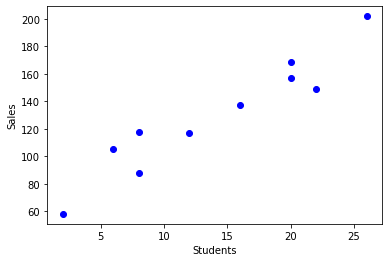

In [19]:
plt.scatter(data.Student_Population,data.Sales,color="b")
plt.xlabel("Students")
plt.ylabel("Sales")
plt.show()

In [20]:
import statsmodels.api as sm
St_pop=data["Student_Population"]
sales=data["Sales"]
st_pop=sm.add_constant(St_pop)
model1=sm.OLS(sales,st_pop)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        20:22:24   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

c:\users\venu  gopal\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\venu  gopal\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [21]:
reg=LinearRegression()
x=data["Student_Population"].values.reshape(-1,1)
y=data["Sales"].values.reshape(-1,1)
reg.fit(x,y)
(b,a)=(reg.intercept_[0],reg.coef_[0][0])


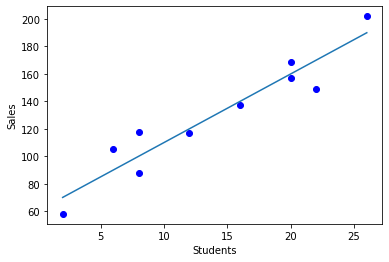

In [22]:

plt.scatter(data.Student_Population,data.Sales,color="b")
plt.xlabel("Students")
plt.ylabel("Sales")

plt.plot(x,a*x + b)
plt.show()

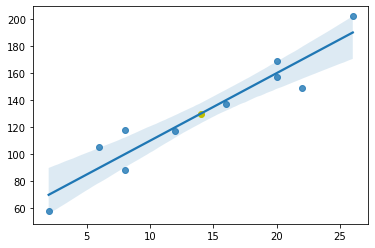

In [23]:
import seaborn as sns 
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color="y")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(result1,alpha=.5)
fittedvalues=data1[:,2]
predict_mean_se=data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp=data1[:,4:6].T
preidct_ci_low,predict_ci_upp=data1[:,6:8].T


In [34]:
predict_mean_ci_low

array([ 64.19167554,  85.49492027,  96.05140126,  96.05140126,
       116.80389673, 136.80389673, 156.05140126, 156.05140126,
       165.49492027, 184.19167554])

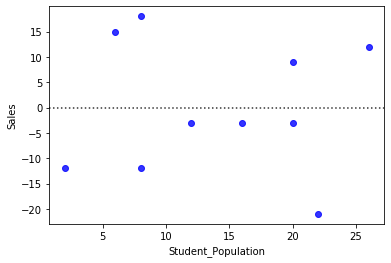

In [37]:
sns.residplot(data["Student_Population"],data["Sales"],color="b")
plt.show()

In [40]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df1=pd.read_excel("C:/Users/Venu  Gopal/Desktop/Icecream.xlsx")
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [44]:
reg=ols(formula= "Sales~Student_Population",data=df1)
fit1=reg.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        20:48:51   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

c:\users\venu  gopal\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [45]:
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [49]:
truck=pd.read_excel("C:/Users/Venu  Gopal/Desktop/TRUCKING.xlsx")
truck

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


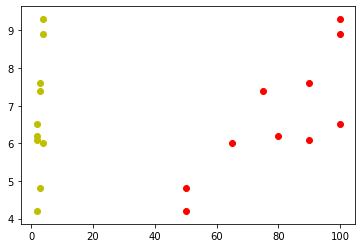

In [65]:
plt.figure()
plt.scatter(truck["x1"],truck["travel_time"],color="r")
plt.scatter(truck["n_of_deliveries"],truck["travel_time"],color="y")
plt.show()

In [67]:
reg1=ols(formula="travel_time~x1+n_of_deliveries",data=truck)
fit2=reg1.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           0.000276
Time:                        22:04:13   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     

In [63]:
anova_table=anova_lm(fit2,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [69]:
tbl=pd.read_excel("C:/Users/Venu  Gopal/Desktop/dummy.xlsx")
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


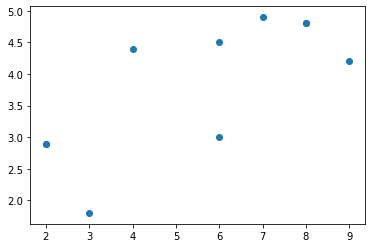

In [71]:
plt.scatter(tbl["months_since_last_service"],tbl["repair_time_in_hours"])
plt.show()

In [73]:
model=ols(formula="repair_time_in_hours~months_since_last_service",data=tbl)
print(model.fit().summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Fri, 13 Mar 2020   Prob (F-statistic):             0.0163
Time:                          22:44:48   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

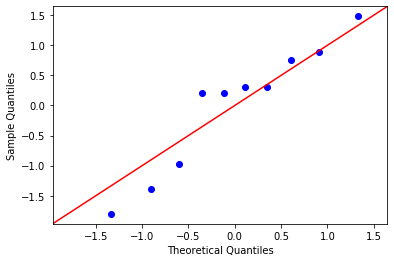

In [77]:
import statsmodels 
res=model.fit().resid
probplot=statsmodels.api.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line="45")
plt.show()

In [78]:
just_dummies=pd.get_dummies(tbl["type_of_repair"])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [81]:
just_dummies=pd.get_dummies(tbl["type_of_repair"])
step_1=pd.concat([tbl,just_dummies],axis=1)
step_1
step_1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [82]:
result=ols("repair_time_in_hours~months_since_last_service+electrical",data=step_1).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Fri, 13 Mar 2020   Prob (F-statistic):            0.00105
Time:                          23:01:05   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

c:\users\venu  gopal\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
